In [59]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.utils import np_utils

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import matplotlib.pyplot as plt

from keras import backend as K
from distutils.version import LooseVersion as LV
from keras import __version__
print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

from keras.datasets import mnist

('Using Keras version:', '2.2.0', 'backend:', u'tensorflow')


- SimpleRNN, a fully-connected RNN where the output is fed back to input.
- LSTM, the Long-Short Term Memory unit layer.
- GRU, the Gated Recurrent Unit layer.

See https://keras.io/layers/recurrent/ for more information.

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_classes = 10
img_rows = 28
img_cols = 28

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)


nb_units = 64

model = Sequential()
# model.add(SimpleRNN(nb_units, input_shape=(img_rows, img_cols)))
# model.add(LSTM(nb_units, input_shape=(img_rows, img_cols)))
model.add(GRU(nb_units, input_shape=(img_rows, img_cols)))
model.add(Dense(units=n_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 64)                17856     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 18,506
Trainable params: 18,506
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
 - 10s - loss: 0.8447 - acc: 0.7061
Epoch 2/10
 - 9s - loss: 0.2083 - acc: 0.9376
Epoch 3/10
 - 10s - loss: 0.1375 - acc: 0.9591
Epoch 4/10
 - 9s - loss: 0.1053 - acc: 0.9687
Epoch 5/10
 - 10s - loss: 0.0873 - acc: 0.9741
Epoch 6/10
 - 9s - loss: 0.0744 - acc: 0.9779
Epoch 7/10
 - 9s - loss: 0.0663 - acc: 0.9796
Epoch 8/10
 - 9s - loss: 0.0585 - acc: 0.9826
Epoch 9/10
 - 9s - loss: 0.0520 - acc: 0.9842
Epoch 10/10
 - 9s - loss: 0.0470 - acc: 0.9855
CPU times: user 3min 49s, sys: 34.7 s, total: 4min 24s
Wall time: 1min 33s


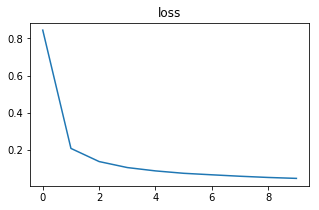

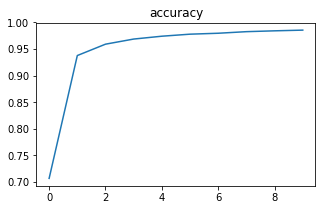

In [62]:
%%time

epochs = 10

history = model.fit(X_train, y_train, epochs=epochs, batch_size=128, verbose=2)

plt.figure(figsize=(5, 3))
plt.plot(history.epoch, history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5, 3))
plt.plot(history.epoch, history.history['acc'])
plt.title('accuracy')


In [63]:
%%time

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 98.10%
CPU times: user 2.75 s, sys: 616 ms, total: 3.36 s
Wall time: 1.46 s


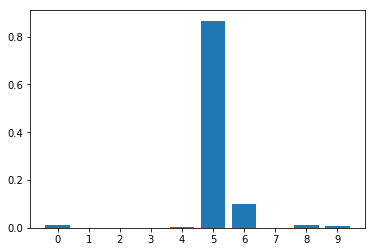

In [64]:
import matplotlib.pyplot as plt
import numpy as np

img_0 = X_test[8:9]
prediction = model.predict(img_0)

x_coordinates = np.arange(prediction.shape[1])

plt.bar(x_coordinates, prediction[0][:])
plt.xticks(x_coordinates, np.arange(10))
plt.show()

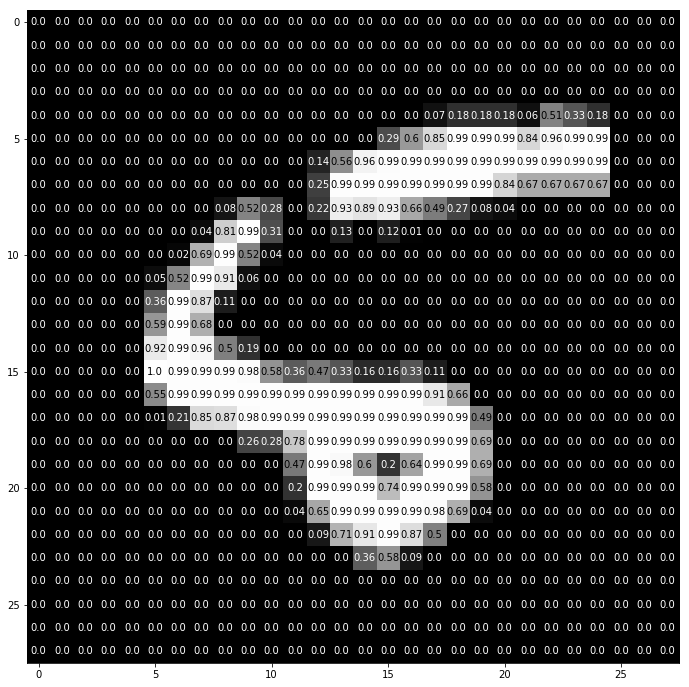

In [65]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(np.reshape(img_0, (28, 28)), ax)